In [1]:
## RUN SUMMARY STATISTICS FOR A DATASET (TASK 2)

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
# IMPORT DATA TASK 2 (HUMAN)
#temp1 = pd.read_csv('../Output/Task2_step4.csv')
temp1 = pd.read_csv('../Output (simulated)/Step4_A.csv')
temp1.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,0.0,0.0,2.0,0.0,5.0,5.0,0.1,1,0,0.0,0,0,0,-1,0.100000,1.0,0.0,0
1,0.0,0.0,2.0,0.0,5.0,5.0,0.1,2,0,0.0,1,0,0,-1,0.076923,1.0,0.0,0
2,0.0,0.0,2.0,0.0,5.0,5.0,0.1,3,1,1.0,2,0,0,-1,0.058824,1.0,0.0,0
3,0.0,0.0,2.0,0.0,5.0,5.0,0.1,1,0,0.0,0,0,0,-1,0.100000,1.0,0.0,0
4,0.0,0.0,2.0,0.0,5.0,5.0,0.1,2,0,0.0,1,0,0,-1,0.076923,1.0,0.0,0


In [4]:
## CHECK THE FINAL BELIEFS ##

In [5]:
# CREATE VECTOR OF "final beliefs" (only when the action is "accuse")
fin = []
for key,value in temp1.iterrows():
    if value[8] == 1.0:
        fin.append(temp1['posterior'][key])

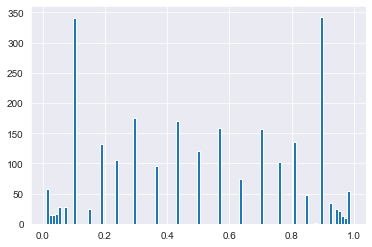

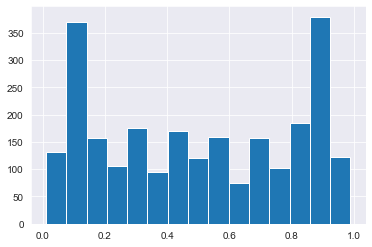

In [6]:
# PLOT FINAL BELIEFS
plt.hist(fin, bins=101)
plt.show()
plt.hist(fin, bins=15)
plt.show()

In [7]:
## CALCULATE SUMMARY STATISITCS ##

In [8]:
# test (human file only)

if 1:
    
    # read dataset
    temp1 = pd.read_csv('../Output/Task2_step4.csv')
    
    
    # isolate accuse rounds and investigation rounds
    t2_accuse = temp1.loc[temp1['action_type'] == 1]
    t2_investigate = temp1.loc[temp1['action_type'] == 0]
    # select accuse and investigation rounds WITHOUT evidence found
    t2_accuse_clean = t2_accuse.loc[t2_accuse['evidence_found'] == 0]
    t2_investigate_clean = t2_investigate.loc[t2_investigate['evidence_found'] == 0]  
    # select accuse rounds WITH evidence found
    t2_accuse_certain = t2_accuse.loc[t2_accuse['evidence_found'] == 1]

    
    # number of collected samples at the accusation round (= round ID - 1)
    distr_stop_time = t2_accuse['current_rounds'].to_list()
    distr_stop_time = [x - 1 for x in distr_stop_time]
    distr_stop_time_average = np.mean(distr_stop_time)
    print(distr_stop_time_average)  
    # equivalent method (same result)
    t2_totsamples = t2_accuse.iloc[:,10]+t2_accuse.iloc[:,11]
    t2_avg_samples = np.mean(t2_totsamples)
    print(t2_avg_samples)

    
    # distribution of beliefs at the accusation round
    distr_stop_belief = t2_accuse['posterior'].to_list()
    
    # percentage correct accusation
    t2_accuse_correct = t2_accuse.iloc[:,15]==t2_accuse.iloc[:,16]
    t2_perc_correct = np.mean(t2_accuse_correct)
    print(t2_perc_correct)
    
    # percentage evidence found
    t2_perc_evidence_found = np.mean(t2_accuse.iloc[:,12])
    print(t2_perc_evidence_found)

    # FIRST ROUND CONFIRMATORY BEHAVIOR (investigate only)
    select_rounds = t2_investigate
    select_rounds = select_rounds.loc[select_rounds.iloc[:,7]==1,:]
    # pr(blue) when blue is more likely
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,6]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    # pr(red) when red is more likely
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,6]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    # confirmatory behavior in round 1
    t2_perc_confirmatory_round1 = np.mean([avg_rounds_low, avg_rounds_high])
    print(t2_perc_confirmatory_round1)

    # ALL ROUNDS CONFIRMATORY BEHAVIOR (investigate only)
    select_rounds = t2_investigate_clean
    # pr(blue) when blue is more likely
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,14]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    # pr(red) when red is more likely
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,14]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    t2_perc_confirmatory_allrounds = np.mean([avg_rounds_low, avg_rounds_high])
    print(t2_perc_confirmatory_allrounds)
    
    # score (good for tasks 2 and 3)
    t2_unitcostred  = t2_accuse.iloc[:,4]
    t2_unitcostblue = t2_accuse.iloc[:,5]
    t2_round_score = 500 + t2_accuse_correct*1000  -t2_unitcostred*t2_accuse.iloc[:,10] -t2_unitcostblue*t2_accuse.iloc[:,11]
    t2_avg_score = np.mean(t2_round_score)    
    print(t2_avg_score)
    

2.9570833333333333
2.9570833333333333
0.86875
0.355
0.7781613791877722
0.5541236554243263
1292.9854166666667


In [9]:
# FUNCTION TO CALCULATE SUMMARY STATISTICS
def c_statistic(file):
    
    # read dataset
    temp1 = pd.read_csv(file)


    # isolate accuse rounds and investigation rounds
    t2_accuse = temp1.loc[temp1['action_type'] == 1]
    t2_investigate = temp1.loc[temp1['action_type'] == 0]
    # select accuse and investigation rounds WITHOUT evidence found
    t2_accuse_clean = t2_accuse.loc[t2_accuse['evidence_found'] == 0]
    t2_investigate_clean = t2_investigate.loc[t2_investigate['evidence_found'] == 0]  
    # select accuse rounds WITH evidence found
    t2_accuse_certain = t2_accuse.loc[t2_accuse['evidence_found'] == 1]

    
    # number of collected samples at the accusation round (= round ID - 1)
    distr_stop_time = t2_accuse['current_rounds'].to_list()
    distr_stop_time = [x - 1 for x in distr_stop_time]
    distr_stop_time_average = np.mean(distr_stop_time)
    #print(distr_stop_time_average)  
    # equivalent method (same result)
    t2_totsamples = t2_accuse.iloc[:,10]+t2_accuse.iloc[:,11]
    t2_avg_samples = np.mean(t2_totsamples)
    #print(t2_avg_samples)

    
    # distribution of beliefs at the accusation round
    distr_stop_belief = t2_accuse['posterior'].to_list()
    
    # percentage correct accusation
    t2_accuse_correct = t2_accuse.iloc[:,15]==t2_accuse.iloc[:,16]
    t2_perc_correct = np.mean(t2_accuse_correct)
    #print(t2_perc_correct)
    
    # percentage evidence found
    t2_perc_evidence_found = np.mean(t2_accuse.iloc[:,12])
    #print(t2_perc_evidence_found)

    # FIRST ROUND CONFIRMATORY BEHAVIOR (investigate only)
    select_rounds = t2_investigate
    select_rounds = select_rounds.loc[select_rounds.iloc[:,7]==1,:]
    # pr(blue) when blue is more likely
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,6]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    # pr(red) when red is more likely
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,6]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    # confirmatory behavior in round 1
    t2_perc_confirmatory_round1 = np.mean([avg_rounds_low, avg_rounds_high])
    #print(t2_perc_confirmatory_round1)

    # ALL ROUNDS CONFIRMATORY BEHAVIOR (investigate only)
    select_rounds = t2_investigate_clean
    # pr(blue) when blue is more likely
    select_rounds_low = select_rounds.loc[select_rounds.iloc[:,14]<0.5,:]
    avg_rounds_low = np.mean(select_rounds_low.iloc[:,9])
    # pr(red) when red is more likely
    select_rounds_high = select_rounds.loc[select_rounds.iloc[:,14]>0.5,:]
    avg_rounds_high = 1-np.mean(select_rounds_high.iloc[:,9])
    t2_perc_confirmatory_allrounds = np.mean([avg_rounds_low, avg_rounds_high])
    #print(t2_perc_confirmatory_allrounds)
    
    # score (good for tasks 2 and 3)
    t2_unitcostred  = t2_accuse.iloc[:,4]
    t2_unitcostblue = t2_accuse.iloc[:,5]
    t2_round_score = 500 + t2_accuse_correct*1000  -t2_unitcostred*t2_accuse.iloc[:,10] -t2_unitcostblue*t2_accuse.iloc[:,11]
    t2_avg_score = np.mean(t2_round_score)    
    #print(t2_avg_score)    
    
    
    # RETURN OUTPUT
    return t2_avg_score,t2_avg_samples,t2_perc_confirmatory_allrounds,t2_perc_confirmatory_round1

In [10]:
name = ['../Output/Task2_step4.csv','../Output (Simulated)/Step4_A.csv',
        '../Output (Simulated)/Step4_B.csv']
for i in name:
    t2_avg_score,t2_avg_samples,t2_perc_confirmatory_allrounds,t2_perc_confirmatory_round1 = c_statistic(i)
    print(i)
    print('t2_avg_score:',t2_avg_score)
    print('t2_avg_samples:',t2_avg_samples)
    print('t2_perc_confirmatory_allrounds:',t2_perc_confirmatory_allrounds)
    print('t2_perc_confirmatory_round1:',t2_perc_confirmatory_round1)

../Output/Task2_step4.csv
t2_avg_score: 1292.9854166666667
t2_avg_samples: 2.9570833333333333
t2_perc_confirmatory_allrounds: 0.5541236554243263
t2_perc_confirmatory_round1: 0.7781613791877722
../Output (Simulated)/Step4_A.csv
t2_avg_score: 947.258
t2_avg_samples: 3.248
t2_perc_confirmatory_allrounds: 0.3841248282752592
t2_perc_confirmatory_round1: 0.18737805977735147
../Output (Simulated)/Step4_B.csv
t2_avg_score: 950.304
t2_avg_samples: 3.2364
t2_perc_confirmatory_allrounds: 0.35439086418793186
t2_perc_confirmatory_round1: 0.190334534012338
